# **Aprendizaje no supervisado**
# UL08. CAPSTONE

## <font color='blue'>**Proyecto**</font>


El presente proyecto consiste en 3 partes. La primera parte consiste en generar mediante técnicas de clustering, los grupos que mejor representen el problema en cuestión.

Luego debera aplicar distintas técnicas de selección de características y de reducción de dimensionalidad para obtener el mejor resultado posible en el problema de clasificación.

El conjunto de datos se encuentra en https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

Ingrese al link si quiere saber más sobre el conjunto de datos.

### __1: Análisis y Segmentación de Departamentos para Arrendadores (Clustering)__

¿Existen grupos de departamentos con características similares que puedan facilitar la búsqueda de un posible arrendador? ¿Cómo se podrían describir estos grupos (con nombres o títulos representativos de cada cluster)?

   - **Análisis Exploratorio:**
     - Realice una limpieza y transformación de los datos si es necesario.
     - Presente estadísticas descriptivas y visualizaciones relevantes para identificar patrones o distribuciones iniciales.

   - **Técnicas de Clustering:**
     - Implemente al menos dos técnicas distintas de clustering (por ejemplo, K-Means, DBSCAN, Agglomerative Clustering, etc.).
     - Limite el análisis a un máximo de 6 clusters para facilitar la interpretación y utilidad del modelo.

   - **Evaluación del Clustering:**
     - Calcule y reporte las métricas de desempeño:
       - **Silhouette Score**
       - **Homogeneity**
       - **Completeness**
     - Analice los resultados y determine qué técnica es más adecuada para este conjunto de datos.

   - **Descripción de Clusters:**
     - Asigne títulos o nombres representativos a los clusters identificados.
     - Describa las características principales que definen cada grupo.

   - **Recomendaciones:**
     - Proponga cómo estos clusters podrían ser utilizados por arrendadores para simplificar la búsqueda de departamentos.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Insalamos Kneed para método del codo en DBSCAN
!pip install kneed

In [ ]:
#Librerias recomendadas a usar
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

from IPython.display import display
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.preprocessing import scale

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import normalize

from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import confusion_matrix,classification_report

# Extras
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.cm as cm

In [ ]:
#Cargue el archivo correspondiente a su ruta de trabajo
data= pd.read_csv("/content/drive/MyDrive/Data_Science/AprendizajeNoSupervisado/Rodrigo/apartments_for_rent_classified_100K.csv",sep = ';', encoding='cp1252', low_memory=False)

In [ ]:
#recuerde explorar el dataset
data.info()
data.describe()
data.describe(include='object').transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

count unique  \
category       99492      7   
title          99492  58503   
body           99492  94503   
amenities      83448   9827   
currency       99492      1   
fee            99492      2   
has_photo      99492      3   
pets_allowed   39068      4   
price_display  99491   3718   
price_type     99492      3   
address         7943   7771   
cityname       99190   2979   
state          99190     51   
source         99492     25   

                                                             top   freq  
category                                  housing/rent/apartment  99431  
title                                Apartment in great location   1064  
body           When searching for a pet-friendly One-, Two- a...     43  
amenities                                                Parking   6188  
currency                                                     USD  99492  
fee                                                           No  99291  
has_photo                                                    Yes  55974  
pets_allowed                                           Cats,Dogs  37097  
price_display                                             $1,350    574  
price_type                                               Monthly  99488  
address                                     8215 S.W 72nd Avenue     19  
cityname                                                  Dallas   2858  
state                                                         TX  11257  
source                                              RentDigs.com  90912


Cantidad de valores nulos después de la eliminación de filas con datos faltantes:
category            0
amenities       15962
bathrooms           0
bedrooms            0
fee                 0
has_photo           0
pets_allowed    60266
price               0
price_type          0
square_feet         0
cityname          273
state             273
latitude            0
longitude           0
dtype: int64
Información del dataset después de la limpieza y transformación:
<class 'pandas.core.frame.DataFrame'>
Index: 97867 entries, 0 to 99491
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      97867 non-null  object 
 1   amenities     82372 non-null  object 
 2   bathrooms     97867 non-null  float64
 3   bedrooms      97867 non-null  float64
 4   fee           97867 non-null  object 
 5   has_photo     97867 non-null  object 
 6   pets_allowed  38637 non-null  object 
 7   price         97867 non-null  float

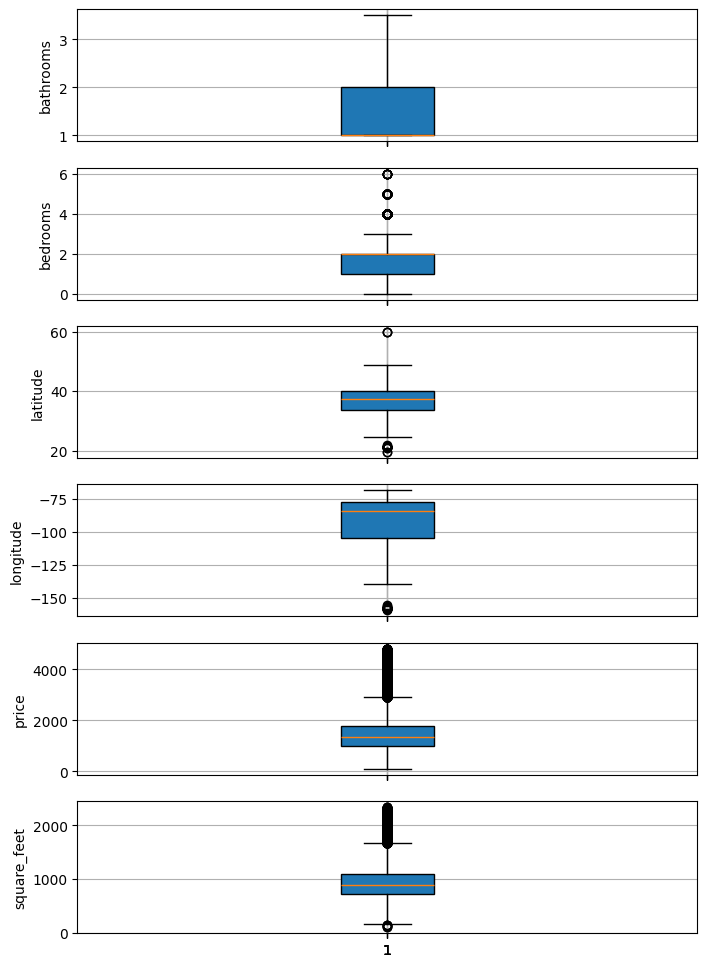

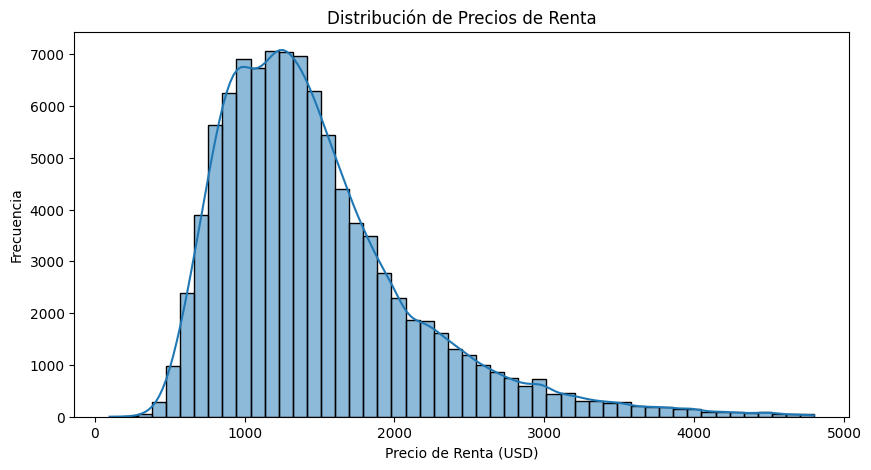

In [ ]:
# Tu código aquí ...

# PRIMERA PARTE#

# Análisis Exploratorio:
## Realice una limpieza y transformación de los datos si es necesario.

### Eliminamos columnas irrelevantes para el análisis (ID, addres, etc.)
### Eliminamos price_display ya que es redundante con price
### Elimnanmos currency, ya que tiene 1 solo valor único.
columnas_irrelevantes = ['id', 'title', 'body', 'address', 'source', 'time', 'price_display', 'currency']
df_cleaned = data.drop(columns=columnas_irrelevantes, errors='ignore')
### Revisamos la cantidad de valores en cada categoría de
data['price_type'].unique()
data['price_type'].value_counts()
### Sólo hay 4 valores distintos a Monthly. Eliminamos estos y la columna price_type
df_cleaned = df_cleaned[df_cleaned['price_type'] == 'Monthly']
df_cleaned = df_cleaned.drop('price_type', errors='ignore')

### Confirmamos que todos los valores que deben ser númericos están en ese formato.

### Eliminamos filas con valores nulos en las columnas que se usarán en el clustering
df_cleaned = df_cleaned.dropna(subset=['price', 'square_feet', 'bathrooms', 'bedrooms', 'latitude', 'longitude'])
### Contamos los valores nulos después de la eliminación
print("\nCantidad de valores nulos después de la eliminación de filas con datos faltantes:")
print(df_cleaned.isnull().sum())

### Limpieza de outliers
columnas = ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'square_feet']
for col in columnas:
    Q1 = df_cleaned[col].quantile(0.1)
    Q3 = df_cleaned[col].quantile(0.9)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= limite_inferior) & (df_cleaned[col] <= limite_superior)]

### Mostramos la información final después de la limpieza
print("Información del dataset después de la limpieza y transformación:")
df_cleaned.info()
print(df_cleaned.describe())

## Presente estadísticas descriptivas y visualizaciones relevantes para identificar patrones o distribuciones iniciales.
### Estadíticas descriptivas del dataset limpiado y modificado
df_cleaned.describe()

### Boxplots
# Definir columnas numéricas
columnas = ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'square_feet']
# Crear la figura y los subgráficos
fig, axes = plt.subplots(nrows=len(columnas), ncols=1, figsize=(8, 12), sharex=True)
# Graficar cada columna en su propio subplot
for i, col in enumerate(columnas):
    axes[i].boxplot(df_cleaned[col], patch_artist=True)
    axes[i].set_ylabel(col)
    axes[i].grid(True)
plt.show()

### Ver distribución de precios
plt.figure(figsize=(10,5))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.xlabel('Precio de Renta (USD)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Renta')
plt.show()


In [ ]:
# Técnicas de Clustering:
## Implemente al menos dos técnicas distintas de clustering (por ejemplo, K-Means, DBSCAN, Agglomerative Clustering, etc.).
### Seleccionar características numéricas relevantes para el clustering
features = ['price', 'square_feet', 'bathrooms', 'bedrooms', 'latitude', 'longitude']
df_cluster = df_cleaned[features]

### Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

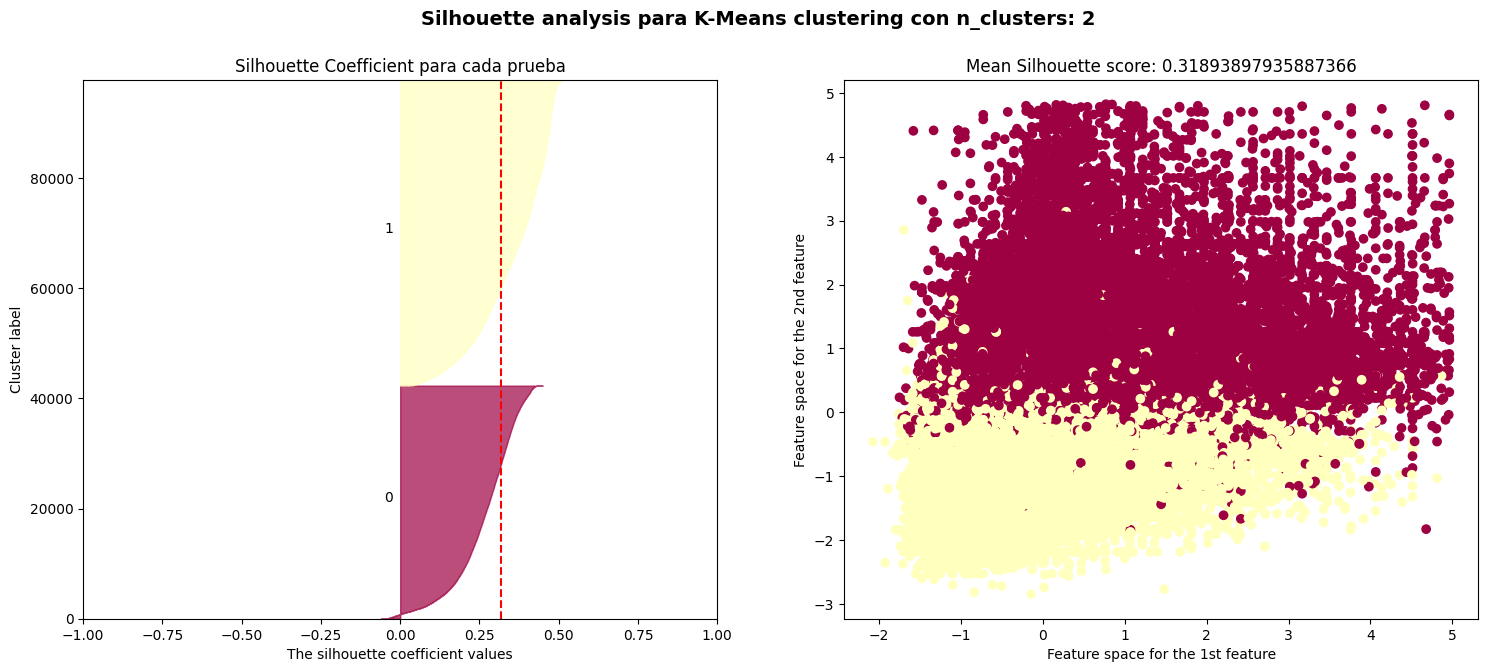

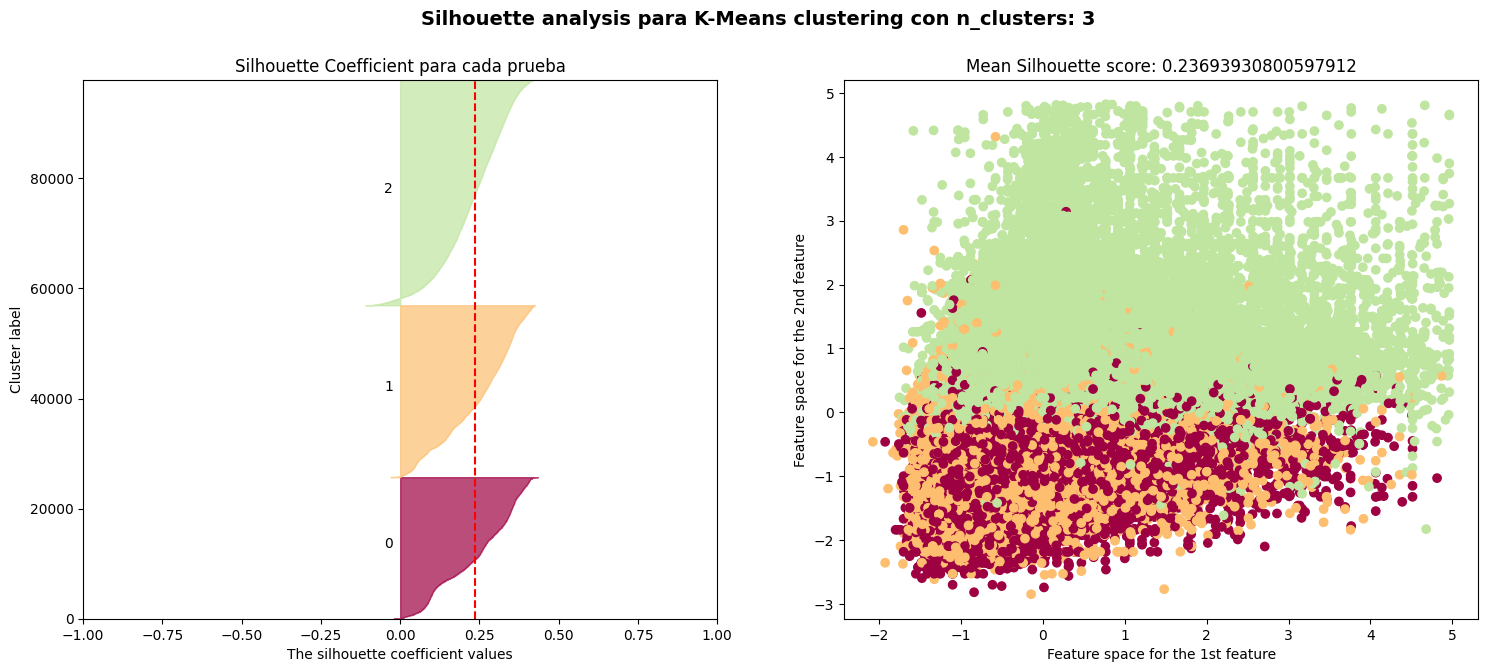

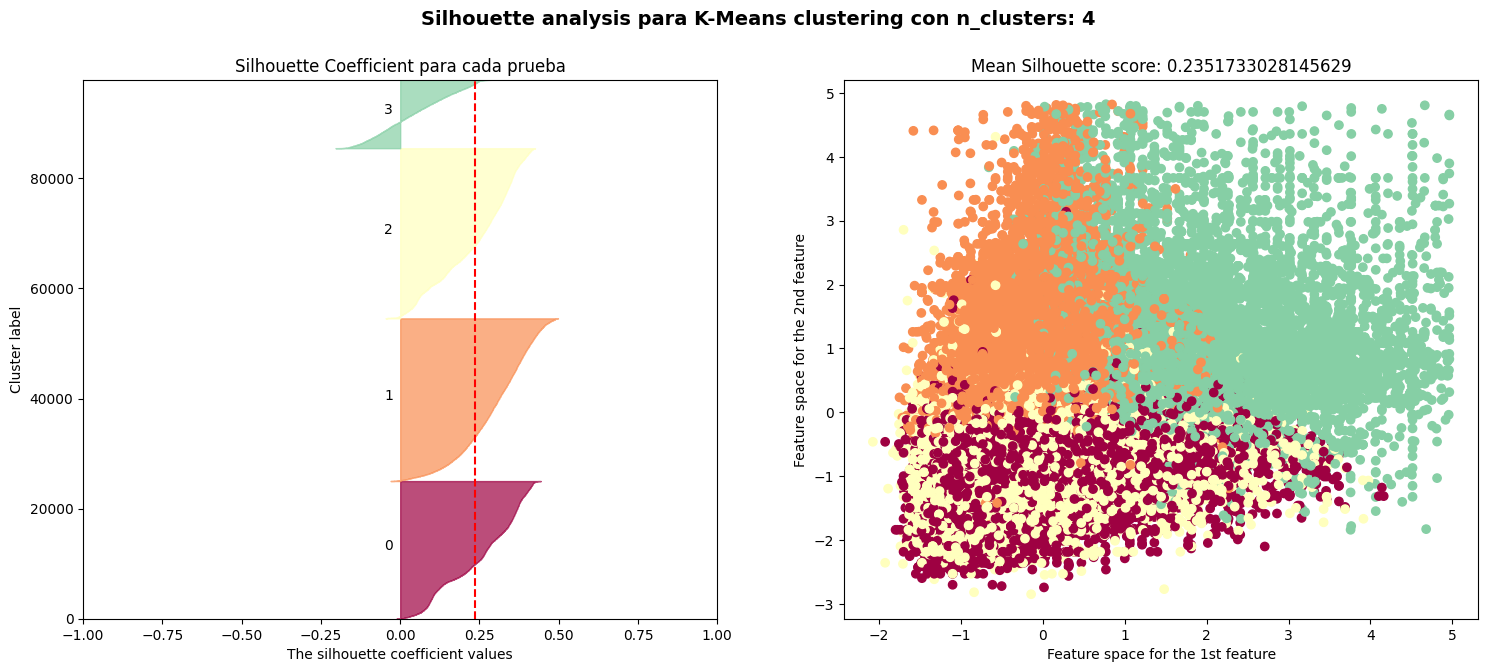

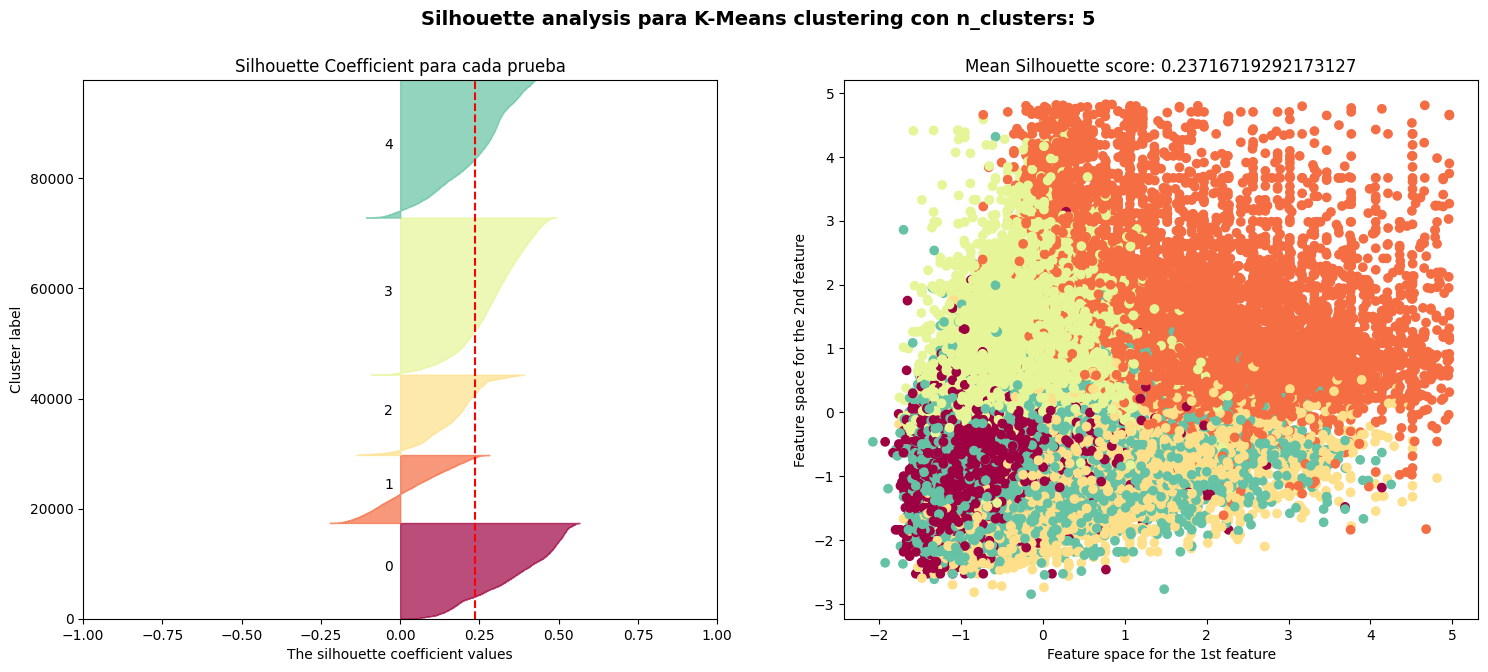

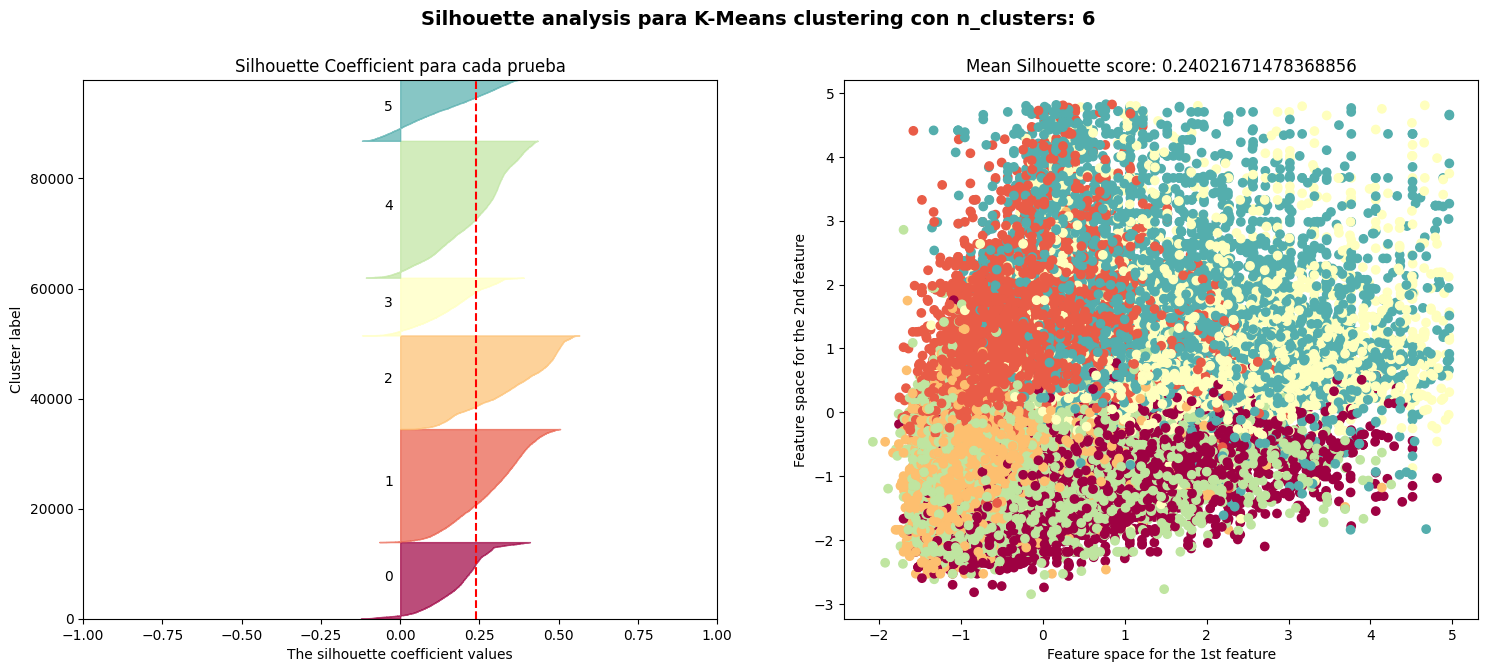

In [ ]:
### Calcular número óptimo de clusters para K-means
# Lista con el número de clusters a probar.
range_n_clusters = [2, 3, 4, 5, 6]

# Guardar los valores de silhouette
silhouette_scores = []

# Para cada cluster, realizar el análisis de Silhouette y visualizar los resultados.
for n_clusters in range_n_clusters:
    # Entrenar K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=98, n_init=10, init='k-means++', tol=1e-4)
    y_pred = kmeans.fit_predict(df_scaled)

    # Calcular el Silhouette Coefficient para cada ejemplo
    s = metrics.silhouette_samples(df_scaled, y_pred)

    # Calcular el Silhouette Coefficient promedio para todos los puntos
    s_mean = metrics.silhouette_score(df_scaled, y_pred)
    silhouette_scores.append(s_mean)

    # Gráficos -----------------------------------------------------------------------------------
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Configurar plot.
    plt.suptitle('Silhouette analysis para K-Means clustering con n_clusters: {}'.format(n_clusters),
                 fontsize=14, fontweight='bold')

    # Configurar primer subplot.
    ax1.set_title('Silhouette Coefficient para cada prueba')
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(df_scaled) + (n_clusters + 1) * 10])

    # Configurar segundo subplot.
    ax2.set_title('Mean Silhouette score: {}'.format(s_mean))
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    # For 1st subplot ------------------------------------------------------------------------------------------

    # Plot Silhouette Coefficient for each sample
    y_lower = 10
    for i in range(n_clusters):
        ith_s = s[y_pred == i]
        ith_s.sort()
        size_cluster_i = ith_s.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_s,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    # Plot the mean Silhouette Coefficient using red vertical dash line.
    ax1.axvline(x=s_mean, color="red", linestyle="--")

    # For 2st subplot -------------------------------------------------------------------------------------------

    # Plot the predictions
    colors = cm.Spectral(y_pred.astype(float) / n_clusters)
    ax2.scatter(df_scaled[:,0], df_scaled[:,1], c=colors)


<ipython-input-9-5b2cd1b9afd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)


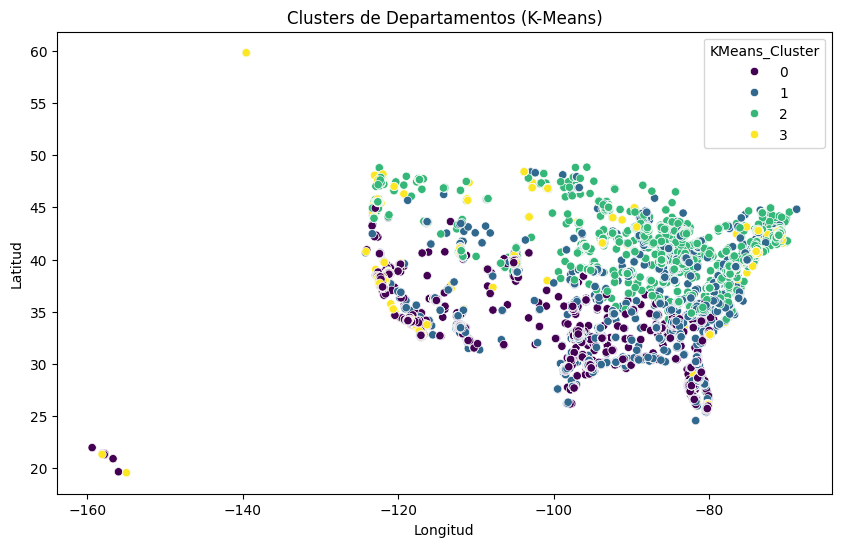

In [ ]:
### Aplicar K-Means con 4 clusters
kmeans = KMeans(n_clusters= 4, random_state=98, n_init=10, init='k-means++', tol=1e-4)
df_cluster['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

### Visualización de clusters con K-Means
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_cluster['longitude'], y=df_cluster['latitude'], hue=df_cluster['KMeans_Cluster'], palette='viridis')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clusters de Departamentos (K-Means)')
plt.show()

### Visualización interactiva de clusters con K-Means
import plotly.express as px
fig = px.scatter_3d(
    df_cluster,
    x='price',
    y='square_feet',
    z='bedrooms',
    color=df_cluster['KMeans_Cluster'],  # Agrupación por colores
    color_continuous_scale='viridis'  # Escala de colores válida
)
fig.show()

0.5020145002953318


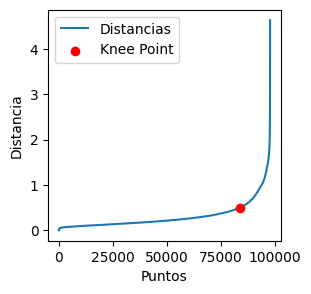

In [ ]:
### Aplicar DBSCAN

### ¿Cómo elegir min_samples?
### Se recomienda usar min_samples = 2 * número de dimensiones
### Tenemos 6 dimensiones --> min_samples = 12
### Probamos números de min_samples desde este valor

### Encontramos eps óptimo con el método del codo
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=30) # utilizamos n_neighbors = min_samples
neighbors = nearest_neighbors.fit(df_scaled)
distances, indices = neighbors.kneighbors(df_scaled)
#### Ordenar las distancias
distances = np.sort(distances[:,-1], axis=0)
### Importamos función para localizar codo
from kneed import KneeLocator
import matplotlib.pyplot as plt
### Calcular el "knee point"
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print(distances[knee.knee])
### Crear la figura y graficar el codo en un solo paso
plt.figure(figsize=(3, 3))
plt.plot(i, distances, label='Distancias')
plt.scatter(knee.knee, distances[knee.knee], color='red', label='Knee Point', zorder=5)
plt.xlabel("Puntos")
plt.ylabel("Distancia")
plt.legend()
plt.show()


<ipython-input-11-3aeee6abde37>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



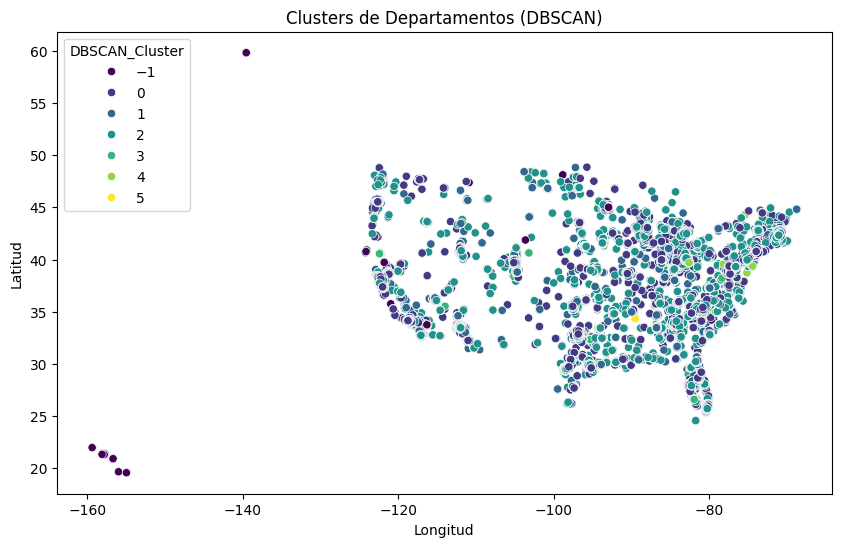

In [ ]:
### Entrenamos el algoritmo DBSCAN
### Probamos desde min_samples 12 y distintos valores de eps.
dbscan = DBSCAN(eps=1.2, min_samples=35)
df_cluster['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

### Visualización de clusters con DBSCAN
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_cluster['longitude'], y=df_cluster['latitude'], hue=df_cluster['DBSCAN_Cluster'], palette='viridis')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clusters de Departamentos (DBSCAN)')
plt.show()

### Visualización interactiva de clusters con DBSCAN
import plotly.express as px
fig = px.scatter_3d(
    df_cluster,
    x='price',
    y='square_feet',
    z='bedrooms',
    color=df_cluster['DBSCAN_Cluster'],  # Agrupación por colores
    color_continuous_scale='viridis'  # Escala de colores válida
)
fig.show()

In [ ]:
# Evaluación del Clustering:
## Calcule y reporte las métricas de desempeño: Silhouette Score, Homogeneity, Completeness

### Filtrar los datos con etiquetas de cluster válidas (evitar outliers en DBSCAN que están etiquetados como -1)
valid_kmeans = df_cluster[df_cluster['KMeans_Cluster'] >= 0]
valid_dbscan = df_cluster[df_cluster['DBSCAN_Cluster'] >= 0]

### Calcular Silhouette Score para K-Means (solo si hay más de un cluster)
if len(valid_kmeans['KMeans_Cluster'].unique()) > 1:
    silhouette_kmeans = silhouette_score(df_scaled, df_cluster['KMeans_Cluster'])
else:
    silhouette_kmeans = None

### Calcular Silhouette Score para DBSCAN (solo si hay más de un cluster)
if len(valid_dbscan['DBSCAN_Cluster'].unique()) > 1:
    silhouette_dbscan = silhouette_score(df_scaled, df_cluster['DBSCAN_Cluster'])
else:
    silhouette_dbscan = None

### Para calcular Homogeneity y Completeness necesitamos etiquetas reales para
### comparar con la predicción. Ya que no tenemos, probaremos usando "category"
### Homogeneity y Completeness para K-Means
homogeneity_kmeans = homogeneity_score(df_cleaned['category'], df_cluster['KMeans_Cluster'])
completeness_kmeans = completeness_score(df_cleaned['category'], df_cluster['KMeans_Cluster'])
### Homogeneity y Completeness para DBSCAN
homogeneity_dbscan = homogeneity_score(df_cleaned['category'], df_cluster['DBSCAN_Cluster'])
completeness_dbscan = completeness_score(df_cleaned['category'], df_cluster['DBSCAN_Cluster'])

### Crear un dataframe con los resultados
resultados = pd.DataFrame({
    "Métrica": ["Silhouette Score", "Homogeneity Score", "Completeness Score"],
    "K-Means": [silhouette_kmeans, homogeneity_kmeans, completeness_kmeans],
    "DBSCAN": [silhouette_dbscan, homogeneity_dbscan, completeness_dbscan]
})
print(resultados)

## Analice los resultados y determine qué técnica es más adecuada para este conjunto de datos.
print('Según la visualización y el Silhouette Score concluimos que el Algoritmo Kmeans es más adecuado que el DBSCAN')


              Métrica   K-Means    DBSCAN
0    Silhouette Score  0.235173  0.138773
1   Homogeneity Score  0.044017  0.032310
2  Completeness Score  0.000184  0.000170
Según la visualización y el Silhouette Score concluimos que el Algoritmo Kmeans es más adecuado que el DBSCAN


In [ ]:
# Descripción de Clusters:
## Describa las características principales que definen cada grupo.
### Definir función para calcular rangos (mínimo y máximo) de cada variable por cluster
def calcular_rangos_por_cluster(df, cluster_column, variables):
    resumen = df.groupby(cluster_column)[variables].agg(['min', 'max'])
    resumen['Cantidad de Puntos'] = df[cluster_column].value_counts()
    return resumen

### Variables utilizadas en el clustering
variables_cluster = ['price', 'square_feet', 'bathrooms', 'bedrooms', 'latitude', 'longitude']

### Calcular rangos para K-Means
rangos_kmeans = calcular_rangos_por_cluster(df_cluster, 'KMeans_Cluster', variables_cluster)
### Calcular rangos para DBSCAN
rangos_dbscan = calcular_rangos_por_cluster(df_cluster, 'DBSCAN_Cluster', variables_cluster)

### Mostrar resultados
print("Rangos de Clusters - K-Means:")
print(rangos_kmeans)
print("\nRangos de Clusters - DBSCAN:")
print(rangos_dbscan)

## Asigne títulos o nombres representativos a los clusters identificados.
print('Según la agrupación de Kmeans tenemos los siguientes clusters:')
print('Cluster 0: Departamentos en el Sur de USA')
print('Cluster 1: Departamentos medianos a grandes, de precio medio')
print('Cluster 2: Departamentos en el Norte de USA')
print('Cluster 3: Departamentos medianos a grandes, de alto precio y en los extremos de USA')


Rangos de Clusters - K-Means:
                 price         square_feet       bathrooms      bedrooms       \
                   min     max         min   max       min  max      min  max   
KMeans_Cluster                                                                  
0                200.0  4265.0         138  1846       1.0  2.0      0.0  4.0   
1                317.0  3000.0         404  2334       1.0  3.5      1.0  5.0   
2                100.0  4140.0         107  2187       1.0  2.0      0.0  4.0   
3               1045.0  4800.0         400  2335       1.0  3.5      0.0  6.0   

               latitude          longitude          Cantidad de Puntos  
                    min      max       min      max                     
KMeans_Cluster                                                          
0               19.6660  45.5676 -159.3698 -77.3802              24994  
1               24.5645  48.4169 -124.2265 -68.7788              29552  
2               32.7193  59.8110 -139

In [ ]:
# Recomendaciones:
## Proponga cómo estos clusters podrían ser utilizados por arrendadores para simplificar la búsqueda de departamentos.
print(f'Se pueden utilizar para filtrar las alternativas de arriendo, de manera de hacer más rápidas las elecciones. También, si las plataformas que ofrecen estos arriendos tienen información de los potenciales arrendadores interesados les pueden sugerir el cluster específico al que pertenecen."')


Se pueden utilizar para filtrar las alternativas de arriendo, de manera de hacer más rápidas las elecciones. También, si las plataformas que ofrecen estos arriendos tienen información de los potenciales arrendadores interesados les pueden sugerir el cluster específico al que pertenecen."


In [ ]:

# Descripción de Clusters:
## Describa las características principales que definen cada grupo.
### Definir función para calcular rangos (mínimo y máximo) de cada variable por cluster
def calcular_rangos_por_cluster(df, cluster_column, variables):
    resumen = df.groupby(cluster_column)[variables].agg(['min', 'max'])
    resumen['Cantidad de Puntos'] = df[cluster_column].value_counts()
    return resumen
### Variables utilizadas en el clustering
variables_cluster = ['price', 'square_feet', 'bathrooms', 'bedrooms', 'latitude', 'longitude']
### Calcular rangos para K-Means
rangos_kmeans = calcular_rangos_por_cluster(df_cluster, 'KMeans_Cluster', variables_cluster)
### Calcular rangos para DBSCAN
rangos_dbscan = calcular_rangos_por_cluster(df_cluster, 'DBSCAN_Cluster', variables_cluster)
### Mostrar resultados
print("Rangos de Clusters - K-Means:")
print(rangos_kmeans)
print("\nRangos de Clusters - DBSCAN:")
print(rangos_dbscan)
## Asigne títulos o nombres representativos a los clusters identificados.
print('Según la agrupación de Kmeans tenemos los siguientes clusters: Cluster 0: , Cluster 1, Cluster 2, Cluster 3: Grandes con muchas habitaciones, Cluster 4:')


# Recomendaciones:
## Proponga cómo estos clusters podrían ser utilizados por arrendadores para simplificar la búsqueda de departamentos.
print(f'Se pueden utilizar para filtrar las alternativas de arriendo, de manera de hacer más rápidas las elecciones. También, si las plataformas que ofrecen estos arriendos tienen información de los arrendadores interesados les pueden sugerir el cluster específico al que se analice que pertenecen."')


Rangos de Clusters - K-Means:
                 price         square_feet       bathrooms      bedrooms       \
                   min     max         min   max       min  max      min  max   
KMeans_Cluster                                                                  
0                200.0  4265.0         138  1846       1.0  2.0      0.0  4.0   
1                317.0  3000.0         404  2334       1.0  3.5      1.0  5.0   
2                100.0  4140.0         107  2187       1.0  2.0      0.0  4.0   
3               1045.0  4800.0         400  2335       1.0  3.5      0.0  6.0   

               latitude          longitude          Cantidad de Puntos  
                    min      max       min      max                     
KMeans_Cluster                                                          
0               19.6660  45.5676 -159.3698 -77.3802              24994  
1               24.5645  48.4169 -124.2265 -68.7788              29552  
2               32.7193  59.8110 -139

### __2: Selección de Características y Predicción de Categorías de Precio__

- **¿Es posible predecir la categoría de precio de un departamento en base a sus características?**  
   - Genere **5 clases** para la variable `price` utilizando los quintiles de su distribución como criterio de clasificación.
   

In [ ]:
#Ejemplo para generar quantiles
categorias, bins = pd.qcut(data['price'], q=5, labels=['muy_bajo', 'bajo', 'mediano', 'alto','muy_alto'], retbins=True)

In [ ]:
df_cat = df_cleaned.copy()

In [ ]:
df_cat['price_category'] = categorias



- **¿Hay una mejora al seleccionar un subconjunto de características para esta tarea?**  
   - Explore si la selección de un menor número de características mejora el desempeño del modelo predictivo, utilizando al menos **tres técnicas de selección de características**, una de cada familia de métodos:
     - **Basados en filtros** (e.g., correlación, chi-cuadrado, etc.).
     - **Basados en envoltura** (e.g., Recursive Feature Elimination - RFE, etc.).
     - **Basados en modelos** (e.g., importancia de características de modelos como Random Forest).

In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97867 entries, 0 to 99491
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   category        97867 non-null  object  
 1   amenities       82372 non-null  object  
 2   bathrooms       97867 non-null  float64 
 3   bedrooms        97867 non-null  float64 
 4   fee             97867 non-null  object  
 5   has_photo       97867 non-null  object  
 6   pets_allowed    38637 non-null  object  
 7   price           97867 non-null  float64 
 8   price_type      97867 non-null  object  
 9   square_feet     97867 non-null  int64   
 10  cityname        97597 non-null  object  
 11  state           97597 non-null  object  
 12  latitude        97867 non-null  float64 
 13  longitude       97867 non-null  float64 
 14  price_category  97867 non-null  category
dtypes: category(1), float64(5), int64(1), object(8)
memory usage: 11.3+ MB


In [ ]:
df_cat.head()

category amenities  bathrooms  bedrooms fee  has_photo  \
0  housing/rent/apartment       NaN        1.0       1.0  No  Thumbnail   
1  housing/rent/apartment       NaN        1.5       3.0  No  Thumbnail   
2  housing/rent/apartment       NaN        2.0       3.0  No  Thumbnail   
3  housing/rent/apartment       NaN        1.0       2.0  No  Thumbnail   
4  housing/rent/apartment       NaN        1.0       1.0  No  Thumbnail   

  pets_allowed   price price_type  square_feet       cityname state  latitude  \
0         Cats  2195.0    Monthly          542  Redondo Beach    CA   33.8520   
1    Cats,Dogs  1250.0    Monthly         1500   Newport News    VA   37.0867   
2          NaN  1395.0    Monthly         1650        Raleigh    NC   35.8230   
3    Cats,Dogs  1600.0    Monthly          820      Vacaville    CA   38.3622   
4    Cats,Dogs   975.0    Monthly          624    Albuquerque    NM   35.1038   

   longitude price_category  
0  -118.3759       muy_alto  
1   -76.4941        mediano  
2   -78.6438        mediano  
3  -121.9712           alto  
4  -106.6110           bajo

In [ ]:
df_cat['fee'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Antes, separamos el dataset en X e y.

X = df_cat.drop('price_category', axis=1)

# y convertimos a dummies las variables categóricas
X = pd.get_dummies(X, columns=['fee', 'has_photo', 'pets_allowed', 'category','cityname', 'state', 'amenities', 'price_type'], drop_first=True)

# Volvemos a definit categorías
categorias, bins = pd.qcut(df_cat['price'], q=5, labels=['muy_bajo', 'bajo', 'mediano', 'alto','muy_alto'], retbins=True)
y = categorias


In [ ]:
# Basados en Filtros

# Utilizaremos el F-Value de ANOVA

# Importamos f_classif desde Scikit-learn
from sklearn.feature_selection import f_classif

# Creamos el objeto f_classif
f_value = f_classif(X, y)

# extraemos categorías
feature_names = X.columns

# Creamos un DF con nombres de atributo y F-values

df_feature_strength = pd.DataFrame({'feature': feature_names, 'strength': f_value[0]})
df_feature_strength.sort_values('strength', ascending=False, inplace=True)
df_feature_strength.head(10)

# El resultado nos entrega la "fuerza" entre las categorías y las variables independientes.

feature       strength
2                    price  116892.782689
2945              state_CA    3819.857958
3              square_feet    3264.513265
0                bathrooms    2155.533272
2960              state_MA    1643.047005
1482  cityname_Los Angeles    1505.255034
1                 bedrooms    1083.112853
2972              state_NJ     828.370316
2976              state_OH     669.408815
2984              state_TX     641.900612

Según ANOVA, las mejores categorías serían:

- state_CA
- square_feet
- bathrooms
- bedrooms
- state_TX

Si consideramos que dos de esas columnas son dummies y las indicamos como las categorías originales, nos quedamos con:

- state
- square feet
- bathrooms
- bedrooms
- cityname

In [ ]:
# Basados en envoltura
# Utilizaremos Exhaustive Feature Selection

# Importamos ExhaustiveFeatureSelector desde Mlxtend
%pip install mlxtend --upgrade
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression



Este método utiliza logistic regression, el cual se puede tornar extremadamente lento al no utilizar GPU, entonces filtraremos y utilizariamos solo variables numéricas. El último intento con todos los features y datos tardó 1:30 y fue detenido antes de terminar. Se limitó también el número de iteraciones.:

In [ ]:

# X solo con variables numéricas
X_num = X[['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']]

# Creamos la instancia del clasificador logistic regression
lr = LogisticRegression(max_iter=500, verbose=False)


# Creamos la instancia EFS
efs = EFS(estimator=lr,        # Utilice la regresión logística como clasificador/estimador
                               # la indicamos quien va a construir el clasificador (lr)
          min_features=1,      # Número mínimo de características a considerar: 1
          max_features=4,      # Número máximo de características a considerar: 4
          scoring='accuracy',  # Métrica a utilizar para evaluar el clasificador
          cv=5)                # Número de cross-validations a ejecutar: 2 (probar con 5 es lo habitual)

# Entrenamos EFS
# Acá pasamos el conjunto de datos de la variable dependiente (y_data) porque ejecutamos
# el modelo (lr) y calculamos la métrica. En los métodos de filtrado NO se usa el modelo (lr)
efs = efs.fit(X_num, y)

# Imprimimos resultados
print(f'\nMejor accuracy score: {efs.best_score_:4.2f}') # best_score_  muestra el mejor score
print(f'Mejor subset (índices): {efs.best_idx_}') # best_idx_  muestra los índices de las
                                                  # caractarísticas que entregan el mejor score
print(f'Mejor subset (nombres): {efs.best_feature_names_}') # best_feature_names_
                                                            # muestra los nombres de las caractarísticas
                                                            # que entregan el mejor score

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/


Mejor accuracy score: 0.31
Mejor subset (índices): (1, 2, 3)
Mejor subset (nombres): ('bedrooms', 'square_feet', 'latitude')


El mejor subset según EFS es el de cantidad de baños y la latitud.

In [ ]:
# Basados en modelos

#Utilizaremos Random Forest CLassifier
# Importamos RandomForestClassifier desde Scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Importamos train_test_split fdesderom Scikit-learn
from sklearn.model_selection import train_test_split

# Dividimos dataset en 30% test y 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [ ]:
# Instanciamos  random forest classifier
rfc = RandomForestClassifier(random_state=0,
                             criterion='gini') # Usamos índice gini para definir
                                               # la importancia de la característica

# Entrenamos el clasificador
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Creamos un DF con nombres de atributo e índices Gini

df_feature_strength = pd.DataFrame({'feature': feature_names, 'strength': rfc.feature_importances_})
df_feature_strength.sort_values('strength', ascending=False, inplace=True)
df_feature_strength.head(10)

feature  strength
2                      price  0.380035
3                square_feet  0.077981
5                  longitude  0.061120
4                   latitude  0.049418
0                  bathrooms  0.020979
1                   bedrooms  0.020349
2945                state_CA  0.013793
9     pets_allowed_Cats,Dogs  0.008805
2960                state_MA  0.007167
8              has_photo_Yes  0.006534

Según el Random Forest Classifier los 5 features que más información aportan para predecir la categoría de precio son:
- square_feet
- longitude
- latitude
- bedrooms
- bathrooms



- **Clasificación y Evaluación del Desempeño:**  
   - Elija un algoritmo de clasificación (por ejemplo, Decision Trees, Random Forest, Logistic Regression, etc.) para realizar la predicción de las categorías de precio.
   - Reporte los resultados obtenidos:
     - **Índice F1** para cada conjunto de características seleccionado.
     - Un reporte de clasificación con métricas clave (precisión, recall, F1 por clase).



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score

df_cat = df_cleaned.copy()
categorias, bins = pd.qcut(df_cat['price'], q=5, labels=['muy_bajo', 'bajo', 'mediano', 'alto','muy_alto'], retbins=True)
#y = categorias
#df_cat['price_category'] = categorias
X = df_cat
# y convertimos a dummies las variables categóricas
X = pd.get_dummies(X, columns=['fee', 'has_photo', 'pets_allowed', 'category','cityname', 'state', 'amenities', 'price_type'], drop_first=True)

# Volvemos a definit categorías

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:

# Función para evaluar el modelo con un subconjunto de características
def evaluate_model(features, print_report=True):
    X_train_subset = X_train[features]
    X_test_subset = X_test[features]

    # Entrenar el modelo
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_subset, y_train)

    # Predecir y evaluar
    y_pred = rf.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    if print_report:
        print(f"\n{'='*60}")
        print(f"Evaluación con {len(features)} características:")
        print(f"Lista de características: {', '.join(features)}")
        print(f"{'='*60}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1 Score (weighted): {f1:.4f}")
        print("\nReporte de clasificación detallado:")
        print(classification_report(y_test, y_pred))

    # Devolver diccionario con todas las métricas
    return {
        'accuracy': accuracy,
        'f1_score': f1,
        'model': rf,
        'predictions': y_pred
    }

# Usaremos las features seleccionadas, según Random Forest:
selected_features_filter = ['square_feet', 'longitude', 'latitude', 'bedrooms', 'bathrooms']


# Evaluar con todas las características
accuracy_all_features = evaluate_model(X_train.columns)
print("Precisión con todas las características:", accuracy_all_features)


# Evaluar con características seleccionadas por Random Forest
accuracy_model = evaluate_model(selected_features_filter)
print("Precisión con características seleccionadas por Random Forest:", accuracy_model)


Evaluación con 12605 características:
Lista de características: bathrooms, bedrooms, price, square_feet, latitude, longitude, fee_Yes, has_photo_Thumbnail, has_photo_Yes, pets_allowed_Cats,Dogs, pets_allowed_Cats,Dogs,None, pets_allowed_Dogs, category_housing/rent/apartment, category_housing/rent/commercial/retail, category_housing/rent/condo, category_housing/rent/home, category_housing/rent/other, category_housing/rent/short_term, cityname_Aberdeen, cityname_Abilene, cityname_Abingdon, cityname_Abington, cityname_Absecon, cityname_Acton, cityname_Acworth, cityname_Addison, cityname_Adelanto, cityname_Adelphi, cityname_Agawam, cityname_Agoura Hills, cityname_Aiken, cityname_Akron, cityname_Alameda, cityname_Alanson, cityname_Albany, cityname_Albemarle, cityname_Albertville, cityname_Albuquerque, cityname_Aledo, cityname_Alexandria, cityname_Algonac, cityname_Alhambra, cityname_Aliquippa, cityname_Aliso Viejo, cityname_Allen, cityname_Allendale, cityname_Allentown, cityname_Alliance, 

In [ ]:
# Ahora, de manera adicional probaremos con las 9 mejores características que arrojó ANOVA
selected_features_filter = ['square_feet', 'bathrooms', 'cityname_Los Angeles', 'state_MA', 'bedrooms', 'state_NJ', 'state_OH', 'state_TX']
# Evaluar con características seleccionadas por ANOVA
accuracy_model = evaluate_model(selected_features_filter)
print("Precisión con características seleccionadas por Random Forest:", accuracy_model)


Evaluación con 8 características:
Lista de características: square_feet, bathrooms, cityname_Los Angeles, state_MA, bedrooms, state_NJ, state_OH, state_TX
Accuracy: 0.4343
F1 Score (weighted): 0.4313

Reporte de clasificación detallado:
              precision    recall  f1-score   support

        alto       0.39      0.36      0.38      5887
        bajo       0.37      0.38      0.37      5954
     mediano       0.36      0.33      0.35      5845
    muy_alto       0.56      0.49      0.52      5732
    muy_bajo       0.48      0.61      0.54      5943

    accuracy                           0.43     29361
   macro avg       0.43      0.43      0.43     29361
weighted avg       0.43      0.43      0.43     29361

Precisión con características seleccionadas por Random Forest: {'accuracy': 0.43431763223323455, 'f1_score': 0.43127672912384823, 'model': RandomForestClassifier(random_state=42), 'predictions': array(['muy_alto', 'bajo', 'muy_bajo', ..., 'mediano', 'alto', 'mediano'],
   

   - Compare el desempeño entre el modelo que utiliza todas las características y aquellos que emplean subconjuntos seleccionados, identificando cuál maximiza el índice F1.

   El modelo que incluye todas las características se desempeña mejor en cuanto a las métricas F1 y accuracy, sin embargo tardó **7 minutos y 26 segundos** en ejecutarse con un runtime basado en la **GPU A100**.
   Con datasets mayores tardaría incluso más.


- **Conclusiones:**  
   - Determine si la selección de características aporta una mejora significativa en el desempeño del modelo.
    - La selección de características aportó Precision, Recall y F1 Score cercanos al 100%, versus alrededor de 70% para la selección de algunos features.

   - Analice la utilidad de las técnicas aplicadas y proponga cómo podrían emplearse en otros problemas similares.
    - Dependiendo de la cantidad de entries, la cantidad de features y los recursos de procesamiento se elige uno u otro. Si los features son del orden de los miles e incluso millones, se hace imposible utilizar todos los features porque el poder de procesamiento neesario crece exponencialmente. Si no son tantas features como en este caso, se pueden utilizar todos.

### __3: Reducción de Dimensionalidad y Clasificación__

- **¿Es posible mejorar el desempeño de clasificación reduciendo las dimensiones del problema?**
   - Aplique la técnica de **Análisis de Componentes Principales (PCA)** para reducir las dimensiones del conjunto de datos previamente procesado.

- **Clasificación y Evaluación:**
   - Utilice el mismo algoritmo de clasificación seleccionado en la **Pregunta 2** para realizar la predicción de las categorías de precio en el conjunto de datos reducido.
   - Entrene el modelo con las componentes principales generadas por PCA.
   - Reporte:
     - **Índice F1**.
     - Un **reporte de clasificación** con las métricas clave (precisión, recall, F1 por clase).

- **Análisis Comparativo:**
   - Compare los resultados obtenidos con respecto a los modelos entrenados en la **Pregunta 2** (sin reducción de dimensionalidad y con selección de características).
   - Comente las diferencias en términos de:
     - Desempeño del modelo.
     - Eficiencia computacional.
     - Interpretabilidad de las características utilizadas en la clasificación.

- **Conclusiones:**
   - Determine si el uso de PCA aporta beneficios significativos para este problema.
   - Discuta posibles aplicaciones y limitaciones del método en tareas similares.

In [ ]:
# ¿Es posible mejorar el desempeño de clasificación reduciendo las dimensiones del problema?
## Aplique la técnica de Análisis de Componentes Principales (PCA) para reducir las dimensiones del conjunto de datos previamente procesado.
### Aplicar PCA para reducir las dimensiones a 2 componentes
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)



In [ ]:


# Clasificación y Evaluación:
## Utilice el mismo algoritmo de clasificación seleccionado en la Pregunta 2 (Random Forest)para realizar la predicción de las categorías de precio en el conjunto de datos reducido.


# Dividimos dataset en 30% test y 70% training
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.3, random_state=0)

rfc = RandomForestClassifier(random_state=0,
                             criterion='gini') # Usamos índice gini para definir
                                               # la importancia de la característica

In [ ]:


# Entrenamos el clasificador
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Evaluar con características reducidas por PCA con Random Forest
# Predecir y evaluar
y_pred = rfc.predict(X_test)


In [ ]:

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\n{'='*60}")
print(f"Evaluación con {len(features)} características:")
print(f"Lista de características: {', '.join(features)}")
print(f"{'='*60}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print("\nReporte de clasificación detallado:")
print(classification_report(y_test, y_pred))

# Devolver diccionario con todas las métricas
print(f'accuracy: {accuracy}, f1_score: {f1}, model: Random Forest predictions: {y_pred}')


Evaluación con 6 características:
Lista de características: price, square_feet, bathrooms, bedrooms, latitude, longitude
Accuracy: 0.6421
F1 Score (weighted): 0.6414

Reporte de clasificación detallado:
              precision    recall  f1-score   support

        alto       0.59      0.58      0.58      5933
        bajo       0.60      0.58      0.59      5956
     mediano       0.56      0.57      0.56      5708
    muy_alto       0.73      0.75      0.74      5790
    muy_bajo       0.72      0.73      0.73      5974

    accuracy                           0.64     29361
   macro avg       0.64      0.64      0.64     29361
weighted avg       0.64      0.64      0.64     29361

accuracy: 0.6420762235618678, f1_score: 0.6414405762482924, model: Random Forest predictions: ['alto' 'mediano' 'muy_alto' ... 'muy_alto' 'bajo' 'mediano']


# Análisis Comparativo:
## Compare los resultados obtenidos con respecto a los modelos entrenados en la Pregunta 2 (sin reducción de dimensionalidad y con selección de características).
Al entrenar el modelo utilizando PCA la eficiencia computacional fue MUCHO mayor, tardando sólo algunos segundos VS al menos 15 a 20 minutos con los dataframes completos o con características seleccionadas.


## Comente las diferencias en términos de: Desempeño del modelo, Eficiencia computacional, Interpretabilidad de las características utilizadas en la clasificación.

- Desempeño: Muy similar al de el modelo con características - seleccionadas, sólo disminuyó alrededor de 5% en las distintas métricas.
- Eficiencia computacional: MUCHO más rápido
- Interpretabilidad: En este modelo se siente mucho más la característica de "caja negra", pues los datos no son interpretables.

# Conclusiones:
## Determine si el uso de PCA aporta beneficios significativos para este problema.

Cuando los recursos son limitados, es una herramienta de gran valor. En este caso el dataset no era tan grande y una espera de una hora no le hace daño a nadie.

## Discuta posibles aplicaciones y limitaciones del método en tareas similares.
### Aplicaciones
- Datasets con muchas dimensiones, no utilizar PCA aumenta exponencialmente el gasto con el aumento de los features.

- Reducir la dimensionalidad de los pixeles en tratamiento de imágenes, video y audio en algoritmos de compresión.

- Análisis de expresiones génicas: Para reducir miles de genes a unas pocas componentes significativas.

- Compresión de datos: Para reducir el tamaño de almacenamiento sin perder demasiada información.

- Eliminación de Ruido: En sensores al aplicar PCA se filtra el ruido aleatorio de las mediciones, ya que conserva los componentes principales con mayor varianza.

- Menor necesidad de almacenamiento de imagen: PCA reduce el tamaño de las imagenes manteniendo la calidad, por lo que requiere menor espacio de almacenamiento


### Limitaciones de PCA:
- Asume linealidad: No es efectivo si las relaciones son no lineales.
Sensibilidad al escalado: Las características deben estandarizarse antes de aplicar PCA.

- Interpretabilidad: Los componentes principales pueden ser difíciles de interpretar en términos de las características originales.

- Pérdida de información: Si la varianza explicada es baja, se pierde información crítica.